### 1a) Linear and Rank Correlation

#### Linear correlation compares the values of data and returns a value close to 1 if the relatioship between the two datasets seems to be close to linear. Rank correlation first ranks the data (and for the sake of calculating the correlation it discards the values), then performs a linear correlation on the ranks. If the relationship between the values is perfectly monotonic, then rank correlation will be 1 or -1 depending on the direction. It does not tell though how far the function describing the relationship would diverge from linear.

### 1b) Scatterplot

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
belize = pd.read_csv('belize_airbnb_listings.csv')
b_con = belize.drop(columns = {'name', 'host_name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'})
b_con = b_con.dropna()
b_con.head(1)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,17.74786,-88.02398,141,3,250,2.0,5,225


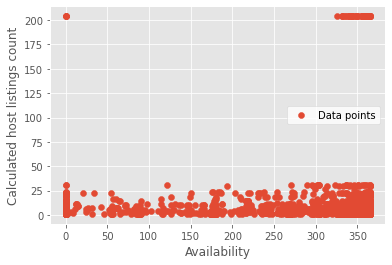

In [4]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.scatter(b_con['availability_365'], b_con['calculated_host_listings_count'], label = 'Data points' )
ax.set_xlabel('Availability')
ax.set_ylabel('Calculated host listings count')
ax.legend(facecolor = 'white')
plt.show()

### 1c) Correlation

In [7]:
corre = b_con['availability_365'].corr(b_con['calculated_host_listings_count'])
corre

0.1665929327135948

#### There is no or very week correlation between these two parameters

### 2) Boxplot and Whiskerplot

In [9]:
b_con['price'].describe()

count     1810.000000
mean       301.879558
std        430.191846
min         20.000000
25%        121.000000
50%        199.000000
75%        328.000000
max      11788.000000
Name: price, dtype: float64

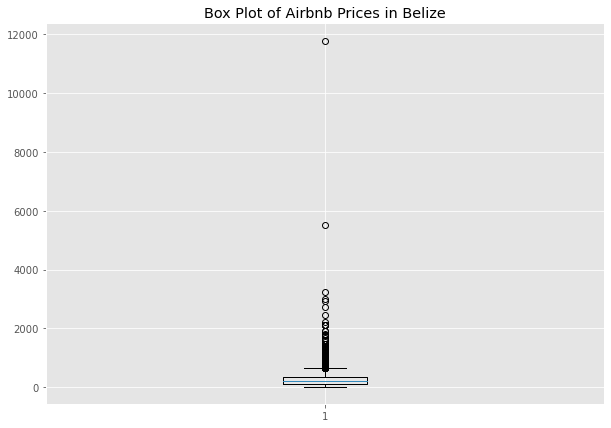

In [22]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot(b_con['price'])

plt.title("Box Plot of Airbnb Prices in Belize")
plt.show()


#### I made it as ugly as it can be... As for the data, it looks like a vast majority of prices are concentrated in the 121-328 region (this is the interquartile range), but there are a number of outliers above 438 (3rd Q + 1.5 x IQR) as far up as 11788 dollars (it would be much even in coffee beans, let alone dollars).